In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# DATA Overview
**Understanding the basic structure and contents of the dataset.**

- How many rows and columns are present?

- What are the data types of each column?

- Are there missing values in any column?

- Are there any duplicate records?


In [6]:
# How many rows and columns are present 
print (df.shape)  #11162 rows, 17 columns

(11162, 17)


In [10]:
#Data types of each column 
print (df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [12]:
# Missing value in any column 
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [15]:
#Are there any duplicate values 
df.duplicated().any()

np.False_

# 1) Customer Demographics Analysis
**Exploring customer profile to identify key patterns.**

- What is the age distribution of customers?

- Which marital status group is most common?

- Which education level is most common?

- How does the subscription rate vary by education and marital status?



In [16]:
#What is the age distribution of customers
print(df["age"].describe())

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64


**Histplot graph for age distribution.**

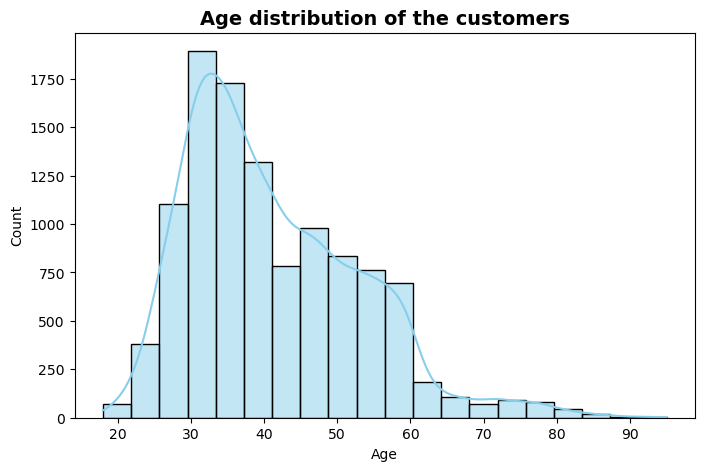

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"],bins=20,kde=True,color="skyblue")
plt.title("Age distribution of the customers", fontsize=14, fontweight= "bold")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [10]:
#Which material status group is most common 
df["marital"].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

**Countplot for Material Status Group.**

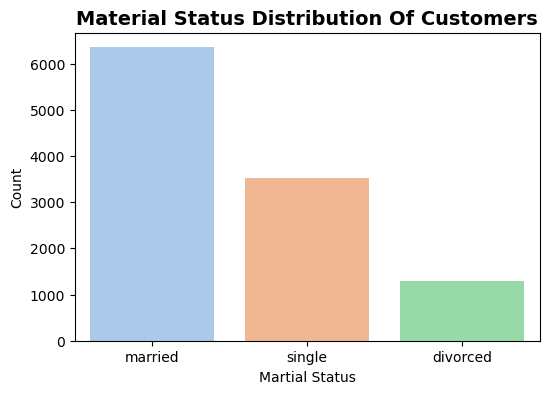

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x="marital",data=df,order=df["marital"].value_counts().index,palette="pastel")
plt.title("Material Status Distribution Of Customers",fontsize=14,fontweight="bold")
plt.xlabel("Martial Status")
plt.ylabel("Count")
plt.show()

In [33]:
# Which education level is most common
edu_counts = df['education'].value_counts() 
edu_counts

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

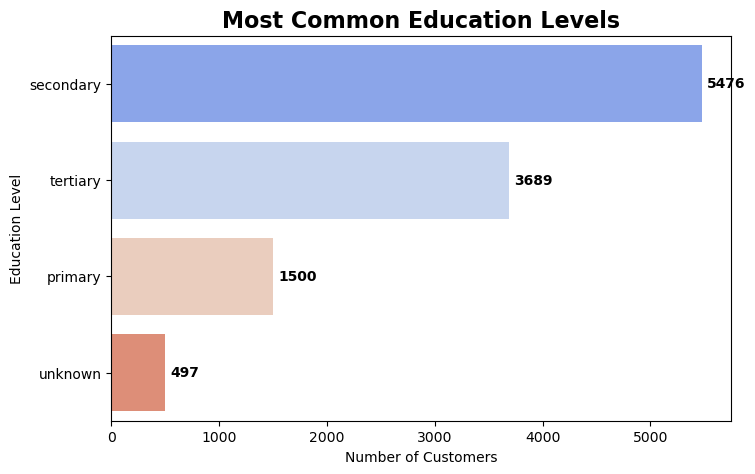

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=edu_counts.values,       # counts
    y=edu_counts.index,        # category names
    palette='coolwarm'
)


for i, v in enumerate(edu_counts.values):
    plt.text(v + 50, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Most Common Education Levels', fontsize=16, fontweight='bold')
plt.xlabel('Number of Customers')
plt.ylabel('Education Level')
plt.show()

In [18]:
#How does the subscription rate vary by education and marital status
subscription_rate=df.groupby(["education","marital"])["deposit"].apply(lambda x:(x=="yes").mean()*100).reset_index(name="subscription_rate")
subscription_rate

,education,marital,subscription_rate
0,primary,divorced,50.980392
1,primary,married,36.032757
2,primary,single,46.192893
3,secondary,divorced,44.631902
4,secondary,married,41.794872
5,secondary,single,50.176056
6,tertiary,divorced,52.590674
7,tertiary,married,49.538795
8,tertiary,single,60.273973
9,unknown,divorced,47.058824


**Heatmap for subscription rate.**

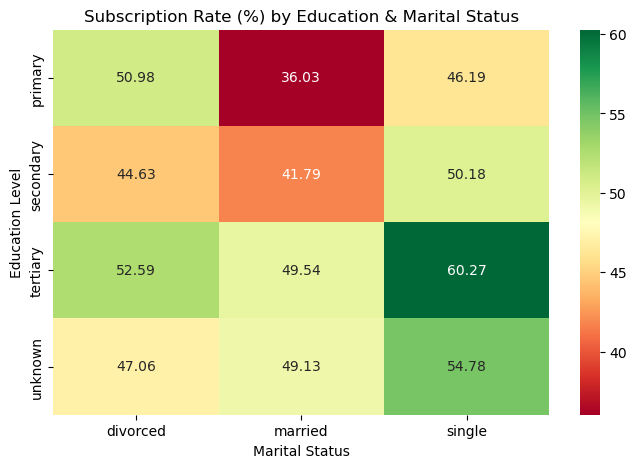

In [14]:
pivot_table = subscription_rate.pivot(index="education", columns="marital", values="subscription_rate")

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="RdYlGn")
plt.title("Subscription Rate (%) by Education & Marital Status")
plt.ylabel("Education Level")
plt.xlabel("Marital Status")
plt.show()

# 2) Campaign Performance Analysis
**Evaluating the effectiveness of the marketing campaign.**

- What percentage of customers subscribed to the term deposit?

- Which contact communication type has the highest success rate?

- Which month had the highest conversion rate?

- How does call duration impact the likelihood of subscription?



In [28]:
# What percentage of customers subscribed to the term deposit
subscribe_rate = (df["deposit"] == 'yes').mean() * 100
print(f"Percentage of customers subscribed: {subscribe_rate:.2f}%")

Percentage of customers subscribed: 47.38%


In [39]:
# Which contact communication type has the highest success rate
grouped = df.groupby("contact")["deposit"]
success_rate = grouped.apply(lambda x: (x == "yes").mean() * 100)
success_rate = success_rate.reset_index(name="Success_rate (%)").sort_values(by="Success_rate (%)", ascending=False)
success_rate

,contact,Success_rate (%)
0,cellular,54.327282
1,telephone,50.387597
2,unknown,22.591645


In [41]:
# Which month had the highest conversion rate
groupedd=df.groupby("month")["deposit"]
conversion_rate=groupedd.apply(lambda x:(x=="yes").mean()*100)
conversion_rate=conversion_rate.reset_index(name="Conversion_rate(%)").sort_values(by="Conversion_rate(%)",ascending=False)
conversion_rate

,month,Conversion_rate(%)
2,dec,90.909091
7,mar,89.855072
11,sep,84.326019
10,oct,82.397959
0,apr,62.513543
3,feb,56.829897
1,aug,45.292956
6,jun,44.680851
9,nov,42.735949
5,jul,41.413474


In [4]:
# How does call duration impact the likelihood of subscription
avg_duration = df.groupby("deposit")["duration"].mean().reset_index()
avg_duration

,deposit,duration
0,no,223.130257
1,yes,537.294574


**See duration distribution for subscribers vs non-subscribers.**

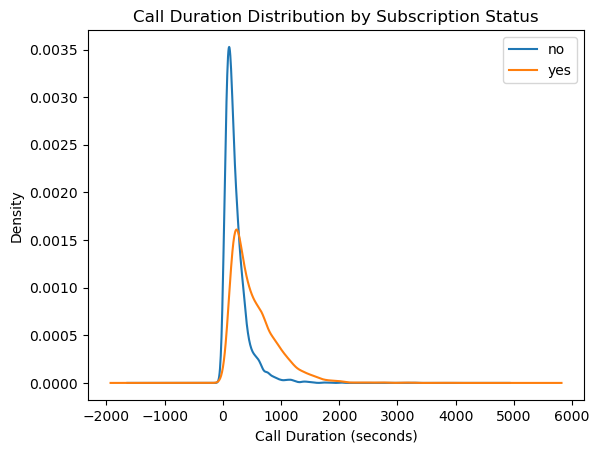

In [5]:
df.groupby("deposit")["duration"].plot(kind='kde', legend=True)
plt.title("Call Duration Distribution by Subscription Status")
plt.xlabel("Call Duration (seconds)")
plt.ylabel("Density")
plt.show()

In [6]:
# we can also check correlational 
correlation = df["duration"].corr((df["deposit"]=="yes").astype(int))
correlation

np.float64(0.45191936084258294)

**How to interpret results:**

- If avg_duration for "yes" is much higher than "no", longer calls seem to improve subscription chances.

- The correlation value will tell you strength & direction:

- Close to +1 → strong positive relationship (longer calls = more likely to subscribe)
Close to 0 → no strong link

- The KDE plot will visually show if "yes" cases tend to have longer durations.

# Financial Behavior Analysis

- Does account balance influence subscription probability?

- Are customers with housing loans more or less likely to subscribe?

- How does having a personal loan affect subscription rates?

- Is there a relationship between account balance and call duration, and how does it differ between customers who subscribed and those who didn’t?

In [8]:
# Does account balance influence subscription probability
df.groupby("deposit")["balance"].mean()



deposit
no     1280.227141
yes    1804.267915
Name: balance, dtype: float64

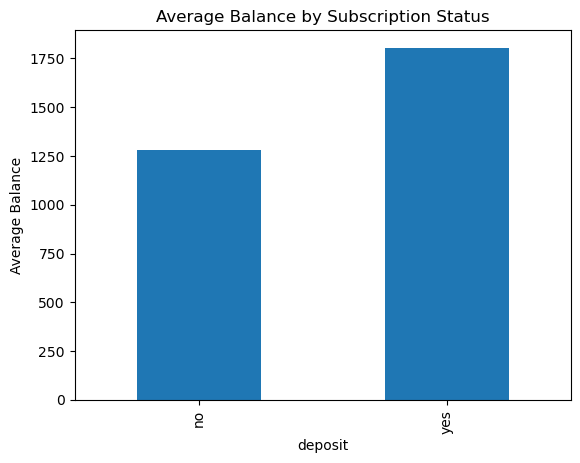

In [15]:
df.groupby("deposit")["balance"].mean().plot(kind="bar")
plt.title("Average Balance by Subscription Status")
plt.ylabel("Average Balance")
plt.show()


In [18]:
# Are customers with housing loans more or less likely to subscribe
housing_subscription_rate = df.groupby('housing')['deposit'].value_counts(normalize=True).unstack()
print(housing_subscription_rate)


deposit        no       yes
housing                    
no       0.429689  0.570311
yes      0.633592  0.366408


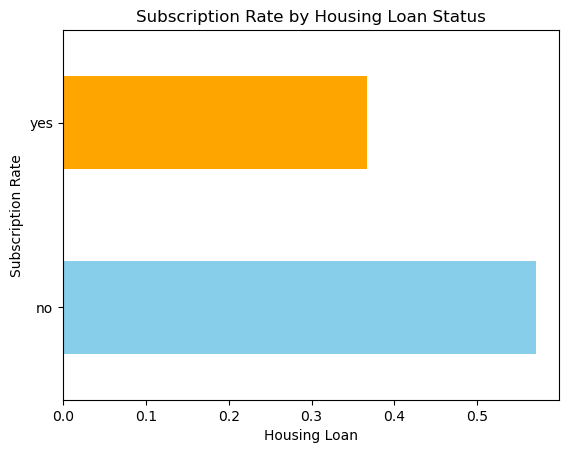

In [21]:
housing_subscription_rate['yes'].plot(kind='barh', color=['skyblue', 'orange'])
plt.title('Subscription Rate by Housing Loan Status')
plt.ylabel('Subscription Rate')
plt.xlabel('Housing Loan')
plt.show()


In [25]:
#How does having a personal loan affect subscription rates?
df.groupby(["loan", "deposit"]).size().unstack()


deposit,no,yes
loan,,
no,4897,4805
yes,976,484


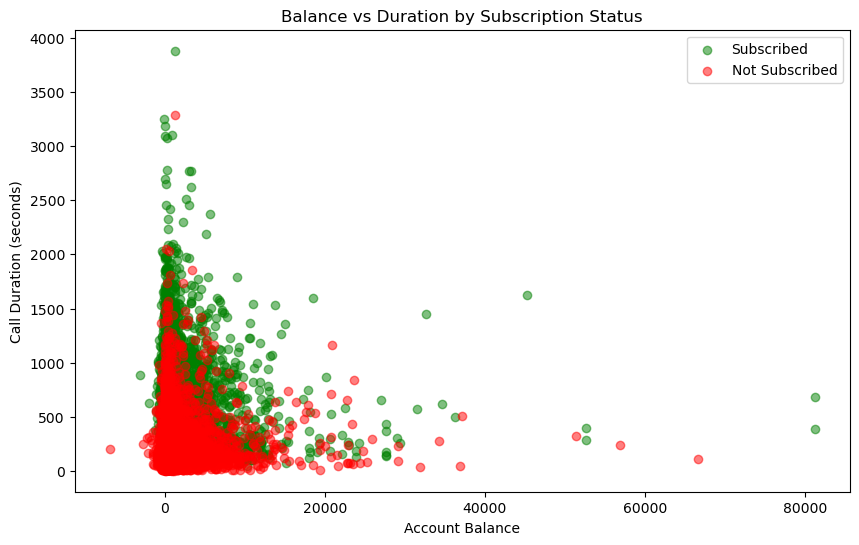

In [26]:
#Is there a relationship between account balance and call duration
#and how does it differ between customers who subscribed and those who didn’t?
plt.figure(figsize=(10, 6))
plt.scatter(
    df[df['deposit'] == 'yes']['balance'], 
    df[df['deposit'] == 'yes']['duration'], 
    alpha=0.5, label='Subscribed', color='green'
)
plt.scatter(
    df[df['deposit'] == 'no']['balance'], 
    df[df['deposit'] == 'no']['duration'], 
    alpha=0.5, label='Not Subscribed', color='red'
)

plt.xlabel('Account Balance')
plt.ylabel('Call Duration (seconds)')
plt.title('Balance vs Duration by Subscription Status')
plt.legend()
plt.show()


# 4) Past Campaign Influence
- How many customers were contacted in previous campaigns?
- Are customers with no prior contact harder to convert?

In [31]:
# How many customers were contacted in the previous campaigns
# Count customers with previous contacts
previous_contacts_count = df[df['previous'] > 0].shape[0]

print("Number of customers contacted in previous campaigns:", previous_contacts_count)


Number of customers contacted in previous campaigns: 2838


In [33]:
#Are customers with no prior contact harder to convert?
# Compare subscription rates for customers with and without prior contact
conversion_rates = df.groupby(df['previous'] > 0)['deposit'].value_counts(normalize=True).unstack()
print(conversion_rates)


deposit         no       yes
previous                    
False     0.593465  0.406535
True      0.328753  0.671247


# 5) Key Segment Identification

- Which combination of factors (education, marital status, loan status) leads to the highest subscription rate?

- Can we identify the top 5 customer profiles with the highest likelihood of subscribing?

In [36]:
# Which combination of factors (education, marital status, loan status) leads to the highest subscription rate?
grouped = df.groupby(['education', 'marital', 'loan'])


subscription_rate = grouped['deposit'].apply(lambda x: (x == 'yes').mean())
highest_rate = subscription_rate.sort_values(ascending=False)

print(highest_rate.head())


education  marital   loan
unknown    single    yes     1.000000
tertiary   single    no      0.615554
           divorced  no      0.544379
unknown    single    no      0.538961
primary    divorced  no      0.535912
Name: deposit, dtype: float64


In [38]:
#Can we identify the top 5 customer profiles with the highest likelihood of subscribing?
profile_rates = (
    df.groupby(['education', 'marital', 'loan'])['deposit'] 
    .apply(lambda x: (x == 'yes').mean())             
    .reset_index(name='subscription_rate')            
)


top_5_profiles = profile_rates.sort_values('subscription_rate', ascending=False).head(5)

print(top_5_profiles)


   education   marital loan  subscription_rate
23   unknown    single  yes           1.000000
16  tertiary    single   no           0.615554
12  tertiary  divorced   no           0.544379
22   unknown    single   no           0.538961
0    primary  divorced   no           0.535912
